In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dataset = dataset.drop(['Serial No.'],axis=1)

In [4]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
features = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']

x = dataset.loc[:, features].values

y = dataset.iloc[:,-1]

x = StandardScaler().fit_transform(x)

In [6]:
#converting colleges to good , medium and bad chances for admission
dataset1 = dataset.copy()
dataset1['Chance of Admit ']=pd.cut(np.array(y),3, labels=["bad", "medium", "good"])
dataset1['Chance of Admit '][:5]

0      good
1    medium
2    medium
3      good
4    medium
Name: Chance of Admit , dtype: category
Categories (3, object): ['bad' < 'medium' < 'good']

In [7]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [8]:
finalDf = pd.concat([principalDf, dataset1[['Chance of Admit ']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,Chance of Admit
0,-3.568375,-0.328318,-0.608675,-0.512976,good
1,-1.639199,0.034550,0.867234,-0.105140,medium
2,0.550991,-0.720794,0.940014,0.066577,medium
3,-0.345470,-1.280237,-0.390081,0.579390,good
4,2.035804,0.039366,-0.691749,-0.616976,medium


In [9]:
pca.explained_variance_ratio_

array([0.67519343, 0.10596446, 0.08023255, 0.0543379 ])

In [10]:
# Together, the FOUR components contain 91.57% of the information.

In [11]:
finalDf = finalDf.drop('Chance of Admit ',axis=1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-3.568375,-0.328318,-0.608675,-0.512976
1,-1.639199,0.034550,0.867234,-0.105140
2,0.550991,-0.720794,0.940014,0.066577
3,-0.345470,-1.280237,-0.390081,0.579390
4,2.035804,0.039366,-0.691749,-0.616976


In [12]:
finalDf['Chance of Admit'] = dataset["Chance of Admit "]
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,Chance of Admit
0,-3.568375,-0.328318,-0.608675,-0.512976,0.92
1,-1.639199,0.034550,0.867234,-0.105140,0.76
2,0.550991,-0.720794,0.940014,0.066577,0.72
3,-0.345470,-1.280237,-0.390081,0.579390,0.80
4,2.035804,0.039366,-0.691749,-0.616976,0.65


In [13]:
#Now splitting to get values of X and y
X = finalDf.iloc[:,:4]
y = finalDf.iloc[:,4] #or y = finalDf["Chance of Admit"]

In [14]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=10)

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_test_predict = lr.predict(X_test)
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2 = r2_score(y_test,y_test_predict)

print("The model performance for training set is: \n")
print("RMSE is {}".format(rmse))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("\n")

The model performance for training set is: 

RMSE is 0.05938709212393884
MSE is 0.0035268267109371987
R2 score is 0.7937833209433434




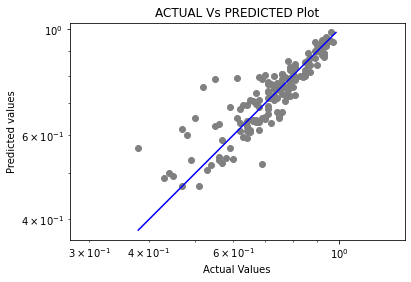

In [17]:
plt.scatter(y_test,y_test_predict,color ='grey')
plt.xscale('log')
plt.yscale('log')
point1 = max(max(y_test_predict),max(y_test))
point2 = min(min(y_test_predict),min(y_test))
#We are now making the plot chart between maximum and minimum points 
plt.plot([point1,point2],[point1,point2],'b-') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.axis('equal')
plt.title("ACTUAL Vs PREDICTED Plot")
plt.show()